# Treinamento CIS - 2º Período (Clusterização)

Utilizando como base o dataset Student Habits vs Academic Performance:
1. Apenas com a observação dos dados por meio de tabelas e dataframe, apresente suas hipóteses;
2. Realize uma EDA da forma que julgar mais adequada;
3. Com base na EDA realizada, revise as suas hipóteses a respeito do dados;
4. Construa um algoritmo de K-Means from scratch utilizando a linguagem Python;
5. Apresente a justificativa de forma discursiva e por meio de cálculos, o valor de K utilizado;
6. Revise as hipóteses levantadas no exercício 1 e 2 e com base no algoritmo desenvolvido, apresente análise crítica a respeito das informações extraídas dos dados caso o algoritmo refute ou confirme suas hipóteses;

input: n instances of a factor in a t dimensional space.

You put how many Ks you want (clusters)

the coordenates you have

you dont have training and testing at this point because you dont have labels

#
place centroids at random locations

atribua cada instancia a um centroide


#
repeat:
for each point xi:
  find nearest centroid cj with argMinD(xi,cj) Euclidian distance
  assign the point xi to cluster j

for each cluster j=1...k:
  new centroid cj=mean of all points xi assigned to cluster j in previous step


condicao de parada: nenhuma instqancia mudar de cluster ou seja, os centroides nao mudam.

## Importação do dataset

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [66]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student_habits_performance.csv", sep=',')

## Conhecendo o dataset


Explorando o dataset: são 16 colunas, com tipos de dado float de 64 bits, inteiro de 64 bits e object. Algumas colunas do tipo object representam valores categóricos binários, como "sim/não" ou "yes/no", e, nesses casos, o ideal é convertê-las para o tipo bool para facilitar operações lógicas e tornar o código mais legível e eficiente.

Destaco, ainda, que o Pandas armazena automaticamente strings como object, tirando a necessidade de convertê-las explicitamente para string por ora.

Na parental_education_level há um(1) valor null. Como esta é uma coluna que não há como preencher o valor ausente com um dado arbitrário, então, irei remover esta linha que contêm valor ausente.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [68]:
df = df.dropna(subset=['parental_education_level'])

Confirmação do processo:

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    object 


Observando as colunas com dados categóricos:

In [70]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [71]:
df['diet_quality'].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [72]:
df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor'], dtype=object)

In [73]:
df['internet_quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

Para os dados categóricos, substituirei a string `'nan'` por `np.nan`, tratando-a como um valor ausente verdadeiro, o que permitirá ao Pandas reconhecer e lidar eficazmente com ela. Em seguida, as linhas com valores nulos serão removidas para eliminar dados incompletos que poderiam prejudicar a análise. Rótulos categóricos serão então mapeados para números: valores ordinais serão transformados usando mapeamento manual que preservará a ordem (como 'Poor' sendo convertido para 0 e 'Good' para 2), e valores nominais serão simplesmente convertidos em números (por exemplo, 'Female' sendo mapeado para 0).

A troca de strings por números será vantajosa pois melhora a eficiência computacional, já que operações matemáticas são mais rápidas em números. Além disso, muitos algoritmos de machine learning requerem entradas numéricas, e a análise estatística se torna mais fácil, permitindo cálculos, comparações e visualizações mais eficazes. Essa transformação, portanto, aprimora a eficiência e a capacidade analítica ao trabalhar com dados em um contexto numérico.

In [74]:
df.replace('nan', np.nan, inplace=True)
df.dropna(inplace=True)

diet_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
education_map = {'High School': 0, 'Bachelor': 1, 'Master': 2}
internet_map = {'Poor': 0, 'Average': 1, 'Good': 2}
gender_map = {'Female': 0, 'Male': 1, 'Other': 2}

df['diet_quality'] = df['diet_quality'].map(diet_map)
df['parental_education_level'] = df['parental_education_level'].map(education_map)
df['internet_quality'] = df['internet_quality'].map(internet_map)
df['gender'] = df['gender'].map(gender_map)

Convertendo as colunas object com valores que podem ser transformados para boolean, onde "Yes" assume o valor True e "No" assume o valor False.

In [75]:
boolean_columns = ["part_time_job", "extracurricular_participation"]

for col in df.select_dtypes(include=['object']).columns:
    if col in boolean_columns:
        df[col] = df[col].map({'Yes': True, 'No': False})
    else:
        df[col] = df[col].astype(str)

print(df.dtypes)

student_id                        object
age                                int64
gender                             int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                       bool
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int64
exercise_frequency                 int64
parental_education_level           int64
internet_quality                   int64
mental_health_rating               int64
extracurricular_participation       bool
exam_score                       float64
dtype: object


## Hipóteses

A partir da visualização dos dados diretamente no dataframe e das variáveis disponíveis, farei minhas hipóteses.

In [76]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,False,85.0,8.0,1,6,2,1,8,True,56.2
1,S1001,20,0,6.9,2.8,2.3,False,97.3,4.6,2,6,0,1,8,False,100.0
2,S1002,21,1,1.4,3.1,1.3,False,94.8,8.0,0,1,0,0,1,False,34.3
3,S1003,23,0,1.0,3.9,1.0,False,71.0,9.2,0,4,2,2,1,True,26.8
4,S1004,19,0,5.0,4.4,0.5,False,90.9,4.9,1,3,2,2,1,False,66.4
5,S1005,24,1,7.2,1.3,0.0,False,82.9,7.4,1,1,2,1,4,False,100.0
6,S1006,21,0,5.6,1.5,1.4,True,85.8,6.5,2,2,2,0,4,False,89.8
7,S1007,21,0,4.3,1.0,2.0,True,77.7,4.6,1,0,1,1,8,False,72.6
8,S1008,23,0,4.4,2.2,1.7,False,100.0,7.1,2,3,1,2,1,False,78.9
9,S1009,18,0,4.8,3.1,1.3,False,95.4,7.5,2,5,1,2,10,True,100.0


Após observação, suponho que:

1. Estudantes que mantêm hábitos de estudo regulares têm um desempenho acadêmico superior.

2. Praticar atividades físicas regularmente pode estar associado a um melhor desempenho escolar.

## EDA

Para fazer uma análise voltada para a hipótese de hábitos de estudo e desempenho acadêmico, começarei com **study_hours_per_day**, que indica o tempo diário dedicado ao estudo, o que pode refletir no esforço e desempenho do aluno. A **attendance_percentage** pode refletir o compromisso acadêmico através da frequência nas aulas, essencial para regularidades no aprendizado. O **parental_education_level** pode influenciar hábitos de estudo, visto que um nível educacional mais elevado dos pais geralmente incentiva disciplina acadêmica nos filhos. A **internet_quality** pode refletir na eficiencia do acesso aos recursos online, que somente uma conexão boa de internet pode proporcionar. Juntos, esses fatores contribuem para os **exam_score**, que representam o desempenho acadêmico global.

Para fazer uma análise voltada para a hipótese de relação entre práticas físicas e desempenho escolar, **exercise_frequency** oferece uma visão sobre a regularidade das atividades físicas, que pode refletir na concentração e disposição. **Diet_quality** pode refletir na disposição mental e física para estudar. O sono adequado pode refletir na memória e concentração, essenciais para um bom aprendizado, por isso utilizarei também **Sleep_hours**. **Mental_health_rating** é um indicador de bem-estar psicológico, frequentemente melhorado por exercícios e dieta balanceada. Por fim, avaliarei a **exam_score** para compreender como escolhas de estilo de vida afetam o desempenho acadêmico, integrando saúde física e mental em uma análise  do impacto sobre os resultados escolares.

Análise inicial através de scatterplot e boxplot:

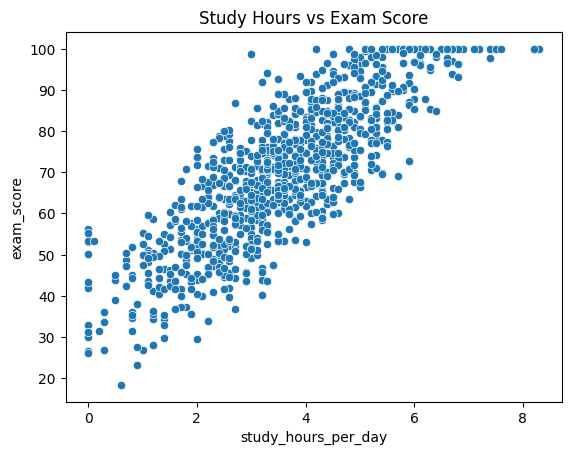

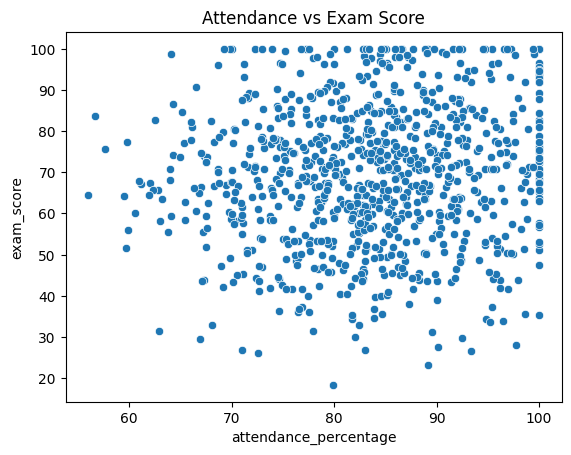

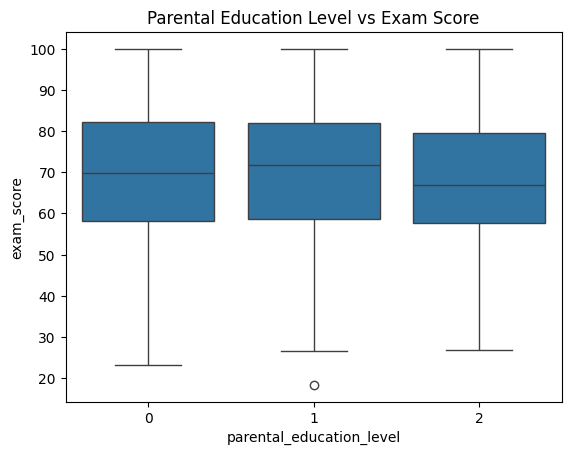

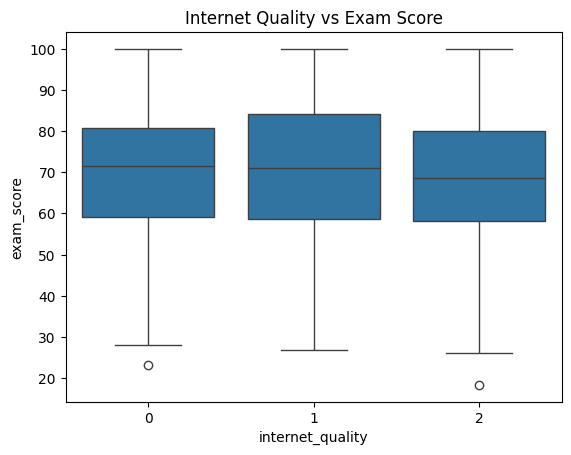

In [77]:
# Visualização para study_hours_per_day e exam_score
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Study Hours vs Exam Score')
plt.show()

# Visualização para attendance_percentage e exam_score
sns.scatterplot(x='attendance_percentage', y='exam_score', data=df)
plt.title('Attendance vs Exam Score')
plt.show()

# Comparação de distribuições baseadas em diferentes níveis de parental_education_level
sns.boxplot(x='parental_education_level', y='exam_score', data=df)
plt.title('Parental Education Level vs Exam Score')
plt.show()

# Comparação de distribuições baseadas na internet_quality
sns.boxplot(x='internet_quality', y='exam_score', data=df)
plt.title('Internet Quality vs Exam Score')
plt.show()

A partir desta análise inicial já pe possível observar que

em Attendance vs Exam Score, não há uma relação clara entre a porcentagem de presença nas aulas e a pontuação nos exames, pois os dados estão bastante dispersos.

Em Parental Education Level vs Exam Score, as medianas dos scores são bastante semelhantes entre os diferentes níveis de educação parental (0 = High School, 1 = Bachelor, 2 = Master). Há uma ligeira sugestão de que níveis mais altos de educação dos pais podem estar associados a uma pontuação um pouco melhor, mas a diferença não é pronunciada, ou seja, o nível de educação dos pais pode ter algum efeito, mas é moderado.
Já em Internet Quality vs Exam Score, não há uma diferença clara nas medianas dos scores entre diferentes qualidades de internet, então a qualidade da internet não parece ter um impacto significativo nas pontuações dos exames.

Por isso, farei as correlações de Pearson e de Spearman entre as colunas de interesse, considerando suas características (numéricas, ordinais):

In [78]:
numerical_cols = [
    'study_hours_per_day', 'attendance_percentage', 'sleep_hours', 'exam_score'
]

ordinal_cols = [
    'diet_quality', 'exercise_frequency', 'mental_health_rating',
    'parental_education_level', 'internet_quality'
]

# Crie um DataFrame filtrado para as colunas de interesse
df_filtered_num = df[numerical_cols]
df_filtered_ord = df[ordinal_cols]

# Calcular a matriz de correlação de Pearson para as colunas numéricas
correlation_matrix_pearson = df_filtered_num.corr(method='pearson')
print("Correlação de Pearson para colunas numéricas:")
print(correlation_matrix_pearson)

# Calcular a matriz de correlação de Spearman para as colunas ordinais
correlation_matrix_spearman = df_filtered_ord.corr(method='spearman')
print("\nCorrelação de Spearman para colunas ordinais:")
print(correlation_matrix_spearman)

# Para combinar:
combined_cols = numerical_cols + ordinal_cols
df_combined = df[combined_cols]

# Calcular a matriz de correlação completa
correlation_matrix_combined = df_combined.corr(method='spearman')
print("\nCorrelação combinada (Spearman):")
print(correlation_matrix_combined)

Correlação de Pearson para colunas numéricas:
                       study_hours_per_day  attendance_percentage  \
study_hours_per_day               1.000000               0.028967   
attendance_percentage             0.028967               1.000000   
sleep_hours                      -0.026241               0.001972   
exam_score                        0.822950               0.096005   

                       sleep_hours  exam_score  
study_hours_per_day      -0.026241    0.822950  
attendance_percentage     0.001972    0.096005  
sleep_hours               1.000000    0.122294  
exam_score                0.122294    1.000000  

Correlação de Spearman para colunas ordinais:
                          diet_quality  exercise_frequency  \
diet_quality                  1.000000            0.009682   
exercise_frequency            0.009682            1.000000   
mental_health_rating          0.033532           -0.001161   
parental_education_level     -0.031066           -0.040377   
intern

Nesta análise das correlações, o tempo de estudo diário (`study_hours_per_day`) tem a relação mais forte com o desempenho acadêmico (`exam_score`), indicando que mais horas de estudo estão claramente associadas a melhores resultados. Além disso, a saúde mental (`mental_health_rating`) mostra uma correlação moderada com as notas, sugerindo que o bem-estar pode influenciar positivamente o desempenho. Outras variáveis, como frequência nas aulas, qualidade da internet e nível educacional dos pais, não apresentam relações significativas, indicando que os fatores principais para a melhoria do desempenho são o foco no estudo e a manutenção de uma boa saúde mental.

## K-means

Focar no K-Means usando 'study_hours_per_day', 'exam_score' e 'mental_health_rating' me permitirá identificar grupos de estudantes com características de desempenho semelhantes, pois essas variáveis são indicadores relevantes e diretos de sucesso acadêmico. As horas de estudo e as pontuações dos exames revelam padrões de comportamento, enquanto a saúde mental influencia tanto o foco quanto o bem-estar geral, impactando os resultados.

In [93]:
# Definir a função de inicialização dos centróides
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.choice(len(X), size=k, replace=False)
    return X[random_indices]

# Atribuir clusters
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Atualizar os centróides
def update_centroids(X, labels, k):
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

# Implementar K-Means
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Definir o número de clusters
k = 1

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
def visualizar_kmeans(features, labels, centroids):
    plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100)
    plt.xlabel('Study Hours Per Day')
    plt.ylabel('Exam Score')
    plt.title('K-Means Clustering')
    plt.show()


# Definindo a função para calcular a soma dos erros quadrados dentro dos clusters
def calculate_inertia(X, centroids, labels):
    inertia = 0
    for i in range(len(centroids)):
        # Seleciona os pontos pertencentes ao cluster i
        cluster_points = X[labels == i]
        # Calcula a distância ao centróide do cluster e soma ao erro quadrado
        inertia += np.sum((cluster_points - centroids[i]) ** 2)
    return inertia
list_inercia = []

### Onde k = 2

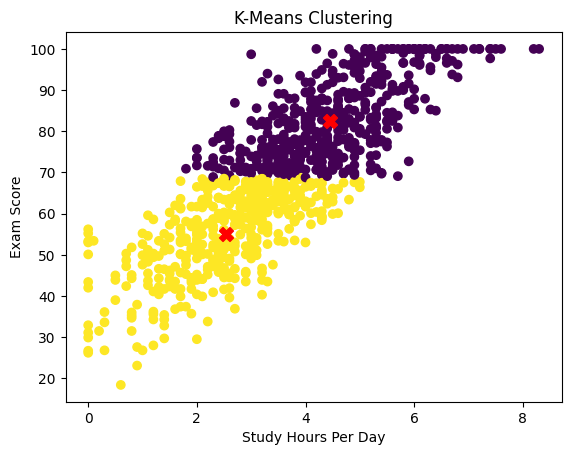

Soma dos erros quadrados dentro dos clusters para K=2: 98419.41594474924


In [94]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 2

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 3

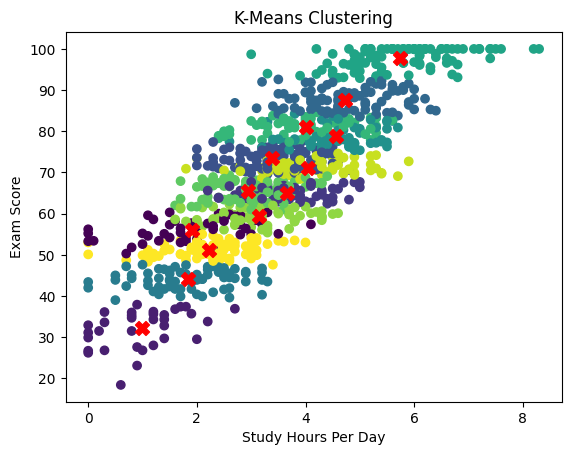

Soma dos erros quadrados dentro dos clusters para K=3: 8462.995173217812


In [107]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters

k = 3

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 4

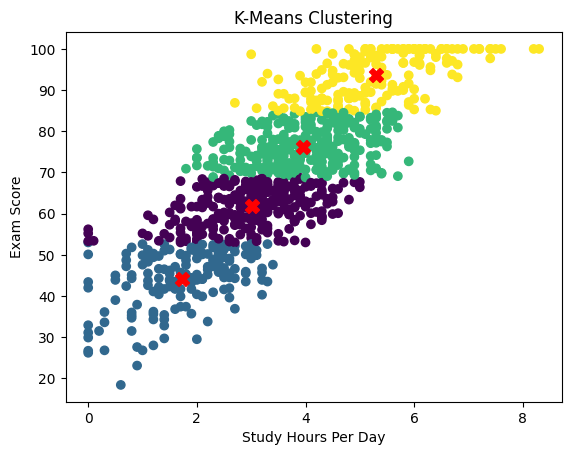

Soma dos erros quadrados dentro dos clusters para K=4: 32214.00540002097


In [96]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 4

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 5

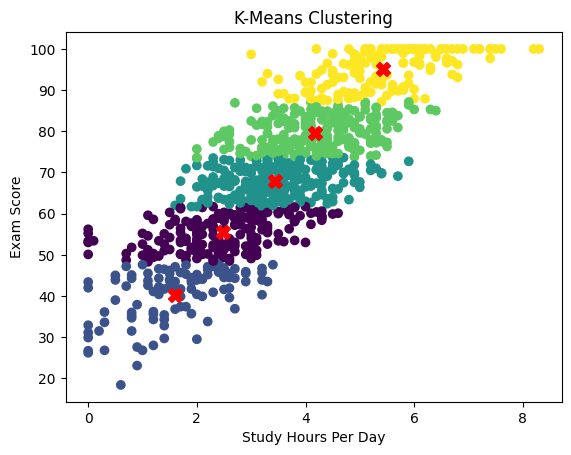

Soma dos erros quadrados dentro dos clusters para K=5: 23801.272242169973


In [97]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 5

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 6

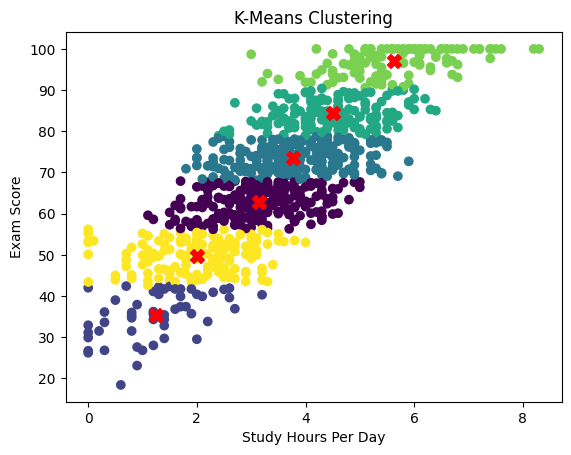

Soma dos erros quadrados dentro dos clusters para K=6: 18120.710886200446


In [98]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 6

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 7

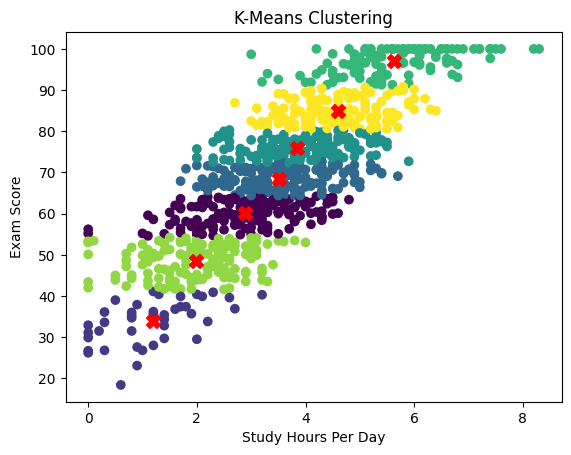

Soma dos erros quadrados dentro dos clusters para K=7: 15341.272419025969


In [99]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 7

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 8

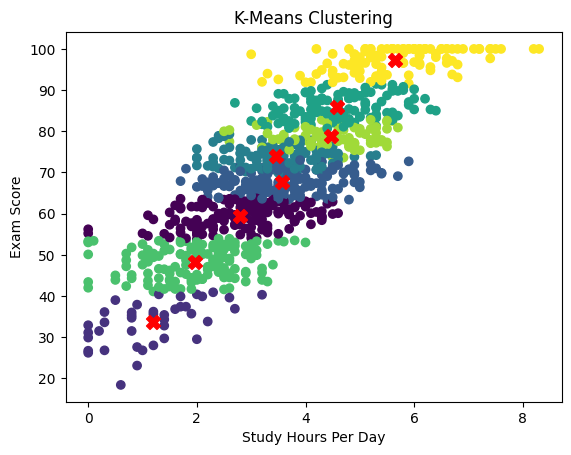

Soma dos erros quadrados dentro dos clusters para K=8: 14181.440462882936


In [100]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 8

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 9

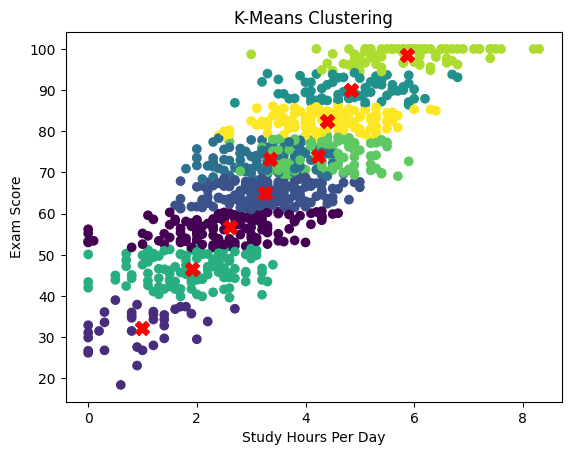

Soma dos erros quadrados dentro dos clusters para K=9: 12328.955201270788


In [101]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 9

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 10

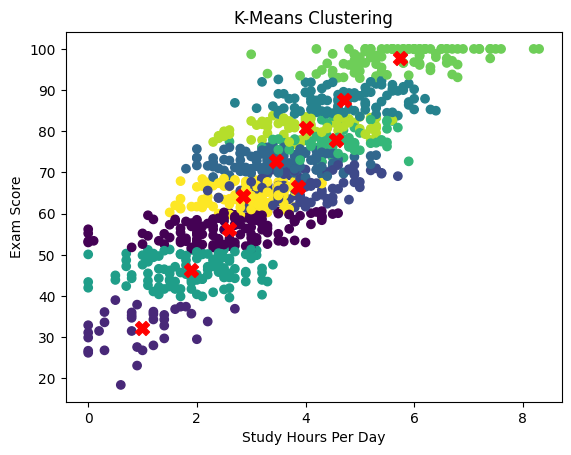

Soma dos erros quadrados dentro dos clusters para K=10: 11609.541788638082


In [102]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 10

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 11

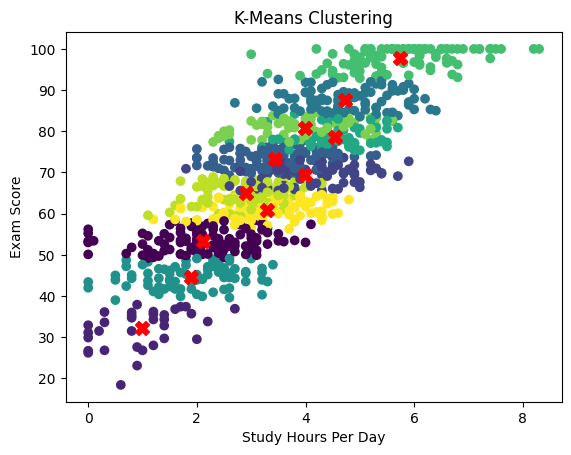

Soma dos erros quadrados dentro dos clusters para K=11: 10038.683898363048


In [103]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k =11

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 12

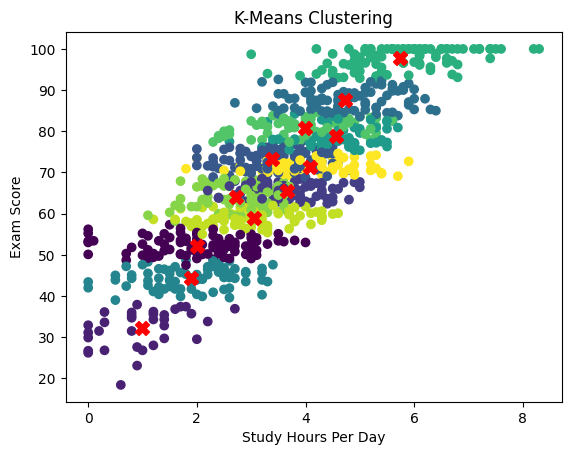

Soma dos erros quadrados dentro dos clusters para K=12: 9261.892314492536


In [104]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 12

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Onde k = 13

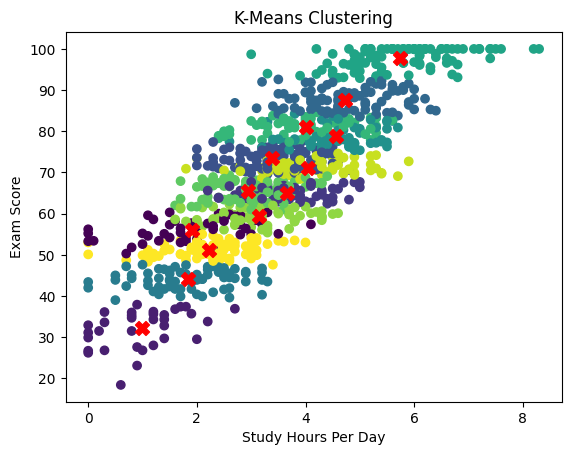

Soma dos erros quadrados dentro dos clusters para K=13: 8462.995173217812


In [105]:
# Selecionar as colunas de interesse para a clusterização
features = df[['study_hours_per_day', 'exam_score', 'mental_health_rating']].values

# Definir o número de clusters
k = 13

# Executar K-Means
centroids, labels = kmeans(features, k)

# Visualizar os resultados
visualizar_kmeans(features, labels, centroids)

# Calcular a soma dos erros quadrados dentro dos clusters
inertia = calculate_inertia(features, centroids, labels)
list_inercia.append(inertia)
print(f"Soma dos erros quadrados dentro dos clusters para K={k}: {inertia}")

### Justificativa do valor de K-means

Para descobrir o valor ideal de K, farei uma análise pelo método do cotovelo, onde identificarei o ponto em que adicionar mais clusters não resulta em uma significativamente maior redução na soma dos erros quadrados dentro dos clusters (inertia).

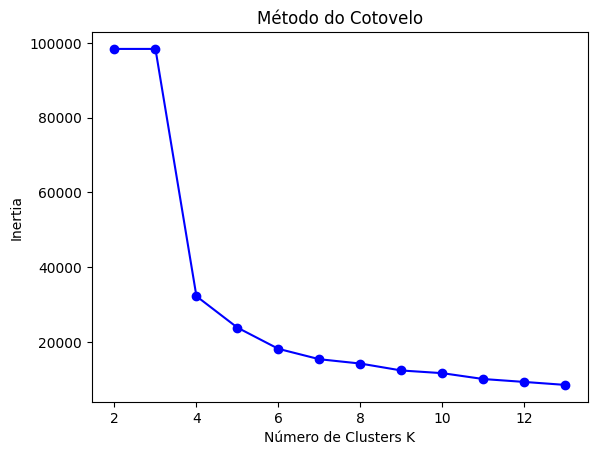

In [106]:
K_range = range(2, 14)

# Visualizar o gráfico do cotovelo
plt.plot(K_range, list_inercia, 'bo-')
plt.xlabel('Número de Clusters K')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')
plt.show()

O "cotovelo" do gráfico é o ponto onde a inércia começa a diminuir menos significativamente com o aumento de K.

No gráfico, isso ocorre em K=4. Após este ponto, adições de clusters não resultam em uma redução significativa na inércia. Assim, concluo que o valor de K ideal é 3 ou 4 clusterspara este conjunto de dados.

## Revisão das Hipóteses


**1.Estudantes que mantêm hábitos de estudo regulares têm um desempenho acadêmico superior:**

O gráfico mostra que os clusters com alunos de maior desempenho também têm mais horas de estudo. Isso apoia a hipótese de que o estudo regular está associado a pontuações mais altas nos exames.

**2.Praticar atividades físicas regularmente pode estar associado a um melhor desempenho escolar:**

Não foram identificadas correlações suficientes para fazer a análise.